<a href="https://colab.research.google.com/github/Subramani-30052005/sub-fake-news-prediction/blob/main/scam_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import libraries

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
#for evaluating the model by analysing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score as CVS
#for saving the model
import pickle


pandas and numpy : used for data manipulation and numerical operations.
nltk : used for natural language processing tasks such as tokenizing and stemming.
sklearn : used for ML, including linear models, metrics evaluation, and save the model.

#data uploading


In [ ]:
tr=pd.read_csv('/content/train (1).csv')

In [ ]:
te=pd.read_csv('/content/test (1).csv')

In [ ]:
tr.dtypes

id         int64
title     object
author    object
text      object
label      int64
dtype: object

In [ ]:
te.dtypes

id         int64
title     object
author    object
text      object
dtype: object

In [ ]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [ ]:
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [ ]:
tr.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
te.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [ ]:
tr.tail()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [ ]:
te.tail()

,id,title,author,text
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...
5199,25999,"Awkward Sex, Onscreen and Off - The New York T...",Teddy Wayne,Perhaps you’ve seen the new TV series whose pi...


In [ ]:
tr.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
te.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

#data preprocessing

##removal of null values

In [ ]:
tr=tr.fillna('')

fill the null values

In [ ]:
te=te.fillna('')
#to replace or fill the value

In [ ]:
tr.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
tr['subject']=tr['author']+' '+tr['title']

combine the author and tile column in subject

In [ ]:
te['subject']=te['author']+' '+te['title']

In [ ]:
tr.head()

,id,title,author,text,label,object,tokens,subject
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...,"[Darrell, Lucus, House, Dem, Aide, :, We, Didn...",Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...","[Daniel, J., Flynn, FLYNN, :, Hillary, Clinton...","Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...,"[Consortiumnews.com, Why, the, Truth, Might, G...",Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...,"[Jessica, Purkiss, 15, Civilians, Killed, In, ...",Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...,"[Howard, Portnoy, Iranian, woman, jailed, for,...",Howard Portnoy Iranian woman jailed for fictio...


In [ ]:
te.head()

,id,title,author,text,subject,tokens
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",david streitfeld specter of trump loosens tong...,"[David, Streitfeld, Specter, of, Trump, Loosen..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,russian warships ready to strike terrorists n...,"[Russian, warships, ready, to, strike, terrori..."
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,common dreams #nodapl: native american leaders...,"[Common, Dreams, #, NoDAPL, :, Native, America..."
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",daniel victor tim tebow will attempt another c...,"[Daniel, Victor, Tim, Tebow, Will, Attempt, An..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,truth broadcast network keiser report: meme wa...,"[Truth, Broadcast, Network, Keiser, Report, :,..."


#tokenization

In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
tr['tokens']=tr['subject'].apply(word_tokenize)

create a new column name is tokens using word_tokenize  

In [ ]:
te['tokens']=te['subject'].apply(word_tokenize)

In [ ]:
tr.head()

,id,title,author,text,label,object,tokens,subject
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...,"[Darrell, Lucus, House, Dem, Aide, :, We, Didn...",Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...","[Daniel, J., Flynn, FLYNN, :, Hillary, Clinton...","Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...,"[Consortiumnews.com, Why, the, Truth, Might, G...",Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...,"[Jessica, Purkiss, 15, Civilians, Killed, In, ...",Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...,"[Howard, Portnoy, Iranian, woman, jailed, for,...",Howard Portnoy Iranian woman jailed for fictio...


##lower casing the text

In [ ]:
tr['subject']=tr['subject'].str.lower()

convert words into lower case

In [ ]:
te['subject']=te['subject'].str.lower()

In [ ]:
tr.head()

,id,title,author,text,label,object,tokens,subject
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...,"[Darrell, Lucus, House, Dem, Aide, :, We, Didn...",darrell lucus house dem aide: we didn’t even s...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...","[Daniel, J., Flynn, FLYNN, :, Hillary, Clinton...","daniel j. flynn flynn: hillary clinton, big wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...,"[Consortiumnews.com, Why, the, Truth, Might, G...",consortiumnews.com why the truth might get you...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...,"[Jessica, Purkiss, 15, Civilians, Killed, In, ...",jessica purkiss 15 civilians killed in single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...,"[Howard, Portnoy, Iranian, woman, jailed, for,...",howard portnoy iranian woman jailed for fictio...


In [ ]:
te.head()

,id,title,author,text,subject,tokens
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",david streitfeld specter of trump loosens tong...,"[David, Streitfeld, Specter, of, Trump, Loosen..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,russian warships ready to strike terrorists n...,"[Russian, warships, ready, to, strike, terrori..."
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,common dreams #nodapl: native american leaders...,"[Common, Dreams, #, NoDAPL, :, Native, America..."
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",daniel victor tim tebow will attempt another c...,"[Daniel, Victor, Tim, Tebow, Will, Attempt, An..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,truth broadcast network keiser report: meme wa...,"[Truth, Broadcast, Network, Keiser, Report, :,..."


##removal punctuation

In [ ]:
tr['subject']=tr['subject'].str.replace('[^/w/s]','')

##remove stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
St_words=stopwords.words('english')
print(St_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
tr['subject']=tr['subject'].apply(lambda x: ' '.join([word for word in x.split()if word not in St_words]))

In [ ]:
tr.head()

,id,title,author,text,label,object,tokens,subject
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...,"[Darrell, Lucus, House, Dem, Aide, :, We, Didn...",Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...","[Daniel, J., Flynn, FLYNN, :, Hillary, Clinton...","Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...,"[Consortiumnews.com, Why, the, Truth, Might, G...",Consortiumnews.com Why Truth Might Get You Fired
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...,"[Jessica, Purkiss, 15, Civilians, Killed, In, ...",Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...,"[Howard, Portnoy, Iranian, woman, jailed, for,...",Howard Portnoy Iranian woman jailed fictional ...


##Stemming and lematization

In [ ]:
stem=PorterStemmer()
tr['subject']=tr['subject'].apply(lambda x: ' '.join([stem.stem(word)for word in x.split()]))

porterstemmer function is used for root word of the given word in the sentence

In [ ]:
tr.head()

,id,title,author,text,label,object,tokens,subject
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...,"[Darrell, Lucus, House, Dem, Aide, :, We, Didn...",darrel lucu hous dem aide: we didn’t even see ...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...","[Daniel, J., Flynn, FLYNN, :, Hillary, Clinton...","daniel j. flynn flynn: hillari clinton, big wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...,"[Consortiumnews.com, Why, the, Truth, Might, G...",consortiumnews.com whi truth might get you fire
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...,"[Jessica, Purkiss, 15, Civilians, Killed, In, ...",jessica purkiss 15 civilian kill in singl us a...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...,"[Howard, Portnoy, Iranian, woman, jailed, for,...",howard portnoy iranian woman jail fiction unpu...


#MODEL BUILDING

In [ ]:
x=tr['subject']
y=tr['label']

In [ ]:
vectorizer=TfidfVectorizer()
vectorizer.fit(x)
x=vectorizer.transform(x)

x will be a sparse matrix where each row represents a document and each column represents a term's TF-IDF score.

In [ ]:
print(x)

  (0, 20082)	0.18569122923094866
  (0, 19451)	0.2804673354197719
  (0, 19111)	0.2538738023821247
  (0, 16482)	0.22004732789115347
  (0, 11079)	0.31027854590858667
  (0, 10754)	0.249287860827764
  (0, 9699)	0.21150710740076684
  (0, 9602)	0.15421430068784922
  (0, 8839)	0.19084641266521293
  (0, 6440)	0.1991033274381912
  (0, 5260)	0.2538738023821247
  (0, 4999)	0.23355319429348412
  (0, 4767)	0.3071190137274408
  (0, 3956)	0.21064761843798654
  (0, 3407)	0.31373942183885084
  (0, 811)	0.33890878358232296
  (1, 20432)	0.29951908908156866
  (1, 8615)	0.19815023888659125
  (1, 7107)	0.711483310803025
  (1, 4732)	0.26268668599849243
  (1, 3782)	0.19062686807106288
  (1, 3104)	0.3870784468942128
  (1, 2717)	0.15460118725006144
  (1, 2262)	0.2928176012009572
  (2, 20659)	0.2907853396543726
  :	:
  (20797, 11775)	0.2909764068763164
  (20797, 11187)	0.35616902888355706
  (20797, 10438)	0.21986788391240106
  (20797, 9561)	0.13983991167770832
  (20797, 8881)	0.2147112695760861
  (20797, 4818)	0.

##training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2,stratify = y,random_state = 42)
# Splitting up the data for traning the model.

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_predict=lr.predict(X_train)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

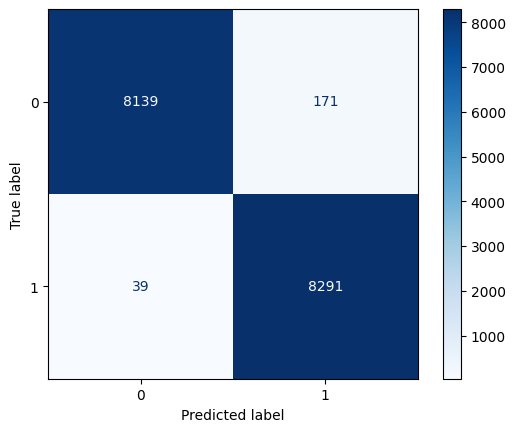

In [ ]:
cm=confusion_matrix(Y_train,y_predict)
d=ConfusionMatrixDisplay(confusion_matrix=cm)
d.plot(cmap=plt.cm.Blues)
plt.show()

   8149 - It indicates True positive (i.e) fake news. It identified correctly that it is a fake news.
161 - It indicates False positive (i.e) Class-1. It predicts the Fake news as true.
42 - It indicates False negative (i.e) it incorrectly predicted as Class-1.
8288 - It indicates True negative(i.e) it correctly predicted as true news

In [ ]:
X_tt_predict =lr.predict(X_test)

accuracy =accuracy_score(Y_test,X_tt_predict)
precision = precision_score(Y_test,X_tt_predict)
recall = recall_score(Y_test,X_tt_predict)
f1 = f1_score(Y_test,X_tt_predict)

print(' Testing Accuracy:', accuracy)
print(' Testing  Precision:', precision)
print(' Testing  Recall:', recall)
print(' Testing  F1 Score:', f1)

 Testing Accuracy: 0.9745192307692307
 Testing  Precision: 0.956581986143187
 Testing  Recall: 0.9942390782525204
 Testing  F1 Score: 0.9750470809792845


Accuracy: Ratio of correctly predicting instances to total instances.

Precision: Ratio correctly predicting positives to total positive.

Recall: Ratio of correctly predicting positive observations to the total observations in an actual class.

The code evaluates the classifier's performance by calculating and printing its accuracy, precision, recall and F1 score.

In [ ]:
tfp = "True_Fake_News_Prediction.sav"
pickle.dump(lr, open(tfp,'wb'))

#project summary

Objective:

To predict whether news articles are true or fake based on their content.

Data Description:

Training Set: 20800 records with 5 attributes (id, title, author, text, label).
Testing Set: 5200 records with 4 attributes (id, title, author, text).

Preprocessing:

Data Cleaning: Remove irrelevant/redundant information, handle missing values, and normalize text (e.g., lowercase, punctuation removal).

Feature Extraction: Convert text data into numerical features using techniques like TF-IDF.

Model training

Classifier: Utilize a model such as Logistic Regression or any suitable classifier.

Training Set: Train the model using the training data to learn the relationship between features (title, text) and labels (true/fake).

Model Evaluation

Testing Set: Assess the model's performance on unseen data to evaluate its ability to generalize.

Performance Metrics: Use metrics like accuracy, precision, recall, and F1 score to measure how well the model distinguishes between true and fake news.

Confusion Matrix: Analyze the types of errors (false positives, false negatives) made by the model.

Model Persistence

Saving the Model: Save the trained model using Python's pickle module for future predictions on new news articles.

Results and Conclusion

Training Accuracy: Measure accuracy of the model on the training set.

Testing Accuracy: Evaluate accuracy on the testing set to ensure the model's generalization capability.

Precision, Recall, F1 Score: Compute these metrics to understand the model's performance in classifying true and fake news.